# enviroCar log analysing

This notebook provides some guidance in how to get some insights from enviroCar log files.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scripts import logparsing
from scripts import plotutils
import pandas as pd

plt.style.use('ggplot')

log_path = "./data/envirocar.log"

## Log report parsing

Parse an enviroCar log file for PID response messages and create a Pandas DataFrame. The resulting DataFrame is time indexed and contains information about a PID event and the corresponding measurement value.

In [2]:
df = logparsing.parse_envirocar_log_pids(log_path)
df

,pid,value
time,,
2021-11-23 18:21:34.568,CALCULATED_ENGINE_LOAD,11.372549
2021-11-23 18:21:34.625,INTAKE_MAP,36.000000
2021-11-23 18:21:34.683,RPM,768.000000
2021-11-23 18:21:34.731,SPEED,0.000000
2021-11-23 18:21:34.787,INTAKE_AIR_TEMP,8.000000
...,...,...
2021-11-23 18:22:59.942,TPS,22.000000
2021-11-23 18:23:00.031,CALCULATED_ENGINE_LOAD,12.549020
2021-11-23 18:23:00.107,INTAKE_MAP,42.000000


## Time-series measurement analysis

Now we will create a time-series plot of speed measurements for a certain timespan. Note that you can adjust the x-axis label tick frequency in seconds by using the `freq_seconds` parameter.

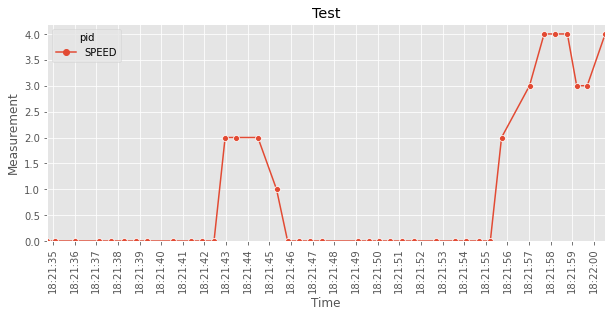

In [9]:
df_speed = df.loc[df["pid"] == "SPEED"]
fig, ax = plotutils.plot(df_speed.loc["2021-11-23T18:21:00":"2021-11-23T18:22:00"], freq_seconds=1)
ax.set(title="Test")
plt.tight_layout()

## Frequency analysis
Next, we want to calculate the frequency of the different PID measurements. We first group our DataFrame by PID with a frequency of one second. This results and in a Data Frame that shows the number of measurements for each PID per second.

In [4]:
df_frequency = df.groupby([pd.Grouper(freq='s'), 'pid']).count()
df_frequency

value
time                pid                          
2021-11-23 18:21:34 CALCULATED_ENGINE_LOAD      2
                    INTAKE_AIR_TEMP             1
                    INTAKE_MAP                  2
                    MAF                         1
                    RPM                         1
...                                           ...
2021-11-23 18:22:59 TPS                         2
2021-11-23 18:23:00 CALCULATED_ENGINE_LOAD      1
                    INTAKE_MAP                  1
                    RPM                         1
                    SPEED                       1

[573 rows x 1 columns]

Before we can plot the measurement frequency for a certain PID, we first have to reset the index, so that the DataFrame is indexed by time solely. We also have to sort the index, since the DataFrame may have become unsorted from the group by operation.

In [5]:
df_frequency.reset_index(level="pid", inplace=True)
df_frequency.sort_index(inplace=True)

Now we are able to select a certain PID and plot its measurement frequency.

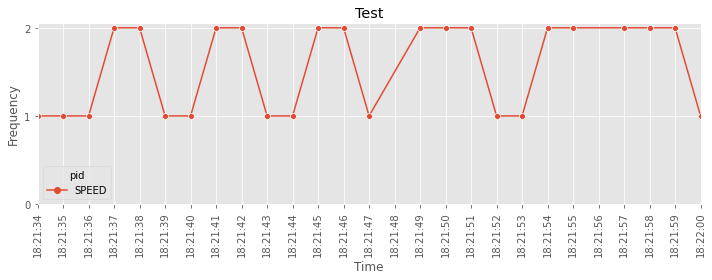

In [11]:
df_frequency_speed = df_frequency.loc[df_frequency["pid"] == "SPEED"]
fig, ax = plotutils.plot(df_frequency_speed.loc["2021-11-23T18:21:00":"2021-11-23T18:22:00"], 1)
ax.set(xlabel="Time", ylabel="Frequency")
ax.set(title="Test")
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.tight_layout()